**Aim :** To implement K-Means clustering using scikit-learn library for unlabeled and labeled data.

**Excercise:** Write a python program to perform K-Means clustering on Breast Cancer Data

**Import Libraries**


In [8]:

import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



**Prepare Data**


In [9]:

dataset=datasets.load_breast_cancer()
dataset

print(dataset.data.shape)
print(dataset.target.shape)


(569, 30)
(569,)


**K-Mean Model**


In [10]:


kmeans = KMeans(n_clusters=10, random_state=111)
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

kmeans.cluster_centers_.shape
print(kmeans.cluster_centers_)


[9 9 2 6 2 0 2 0 0 0 4 8 8 4 0 4 4 8 1 0 6 3 4 1 9 8 4 8 8 8 2 0 8 2 8 8 0
 6 0 0 0 6 2 0 0 2 3 0 6 0 6 0 6 8 4 6 9 4 6 3 3 3 4 3 0 4 3 6 3 6 9 3 2 0
 6 8 6 2 2 6 6 6 7 8 6 2 0 2 6 0 0 4 0 0 4 2 6 3 6 0 4 3 6 3 3 0 6 6 1 6 3
 6 0 3 3 6 3 4 8 8 6 2 1 0 0 0 0 2 0 2 6 4 8 4 2 0 6 6 4 6 3 8 6 0 3 6 6 0
 0 0 6 3 3 6 0 6 8 4 6 6 6 2 9 6 1 0 3 8 2 0 6 4 4 3 3 3 3 4 6 6 7 9 8 6 4
 3 8 6 6 6 0 6 3 0 0 6 0 8 2 4 6 8 9 4 0 4 3 8 0 4 2 6 7 4 0 0 6 3 9 1 0 0
 3 4 0 4 3 0 6 0 8 6 6 9 3 0 7 2 0 8 0 6 6 0 2 3 6 6 3 6 9 6 9 8 9 0 9 4 8
 4 9 8 8 4 8 7 3 0 6 3 0 6 1 3 8 6 6 8 0 0 2 6 2 4 6 6 6 6 6 6 0 0 6 6 6 0
 3 6 0 3 9 6 2 3 6 6 0 3 0 0 6 0 6 6 3 6 6 2 3 6 3 2 6 9 6 6 0 6 4 4 4 6 6
 6 6 8 6 9 3 7 0 3 6 2 6 3 6 4 6 6 6 4 7 4 6 6 6 0 3 3 6 0 6 4 0 9 2 6 7 1
 8 0 2 9 0 4 3 0 0 6 6 6 6 6 0 0 6 0 6 8 3 3 8 9 6 0 0 6 6 6 8 6 6 6 6 6 4
 0 8 6 6 6 3 4 4 6 3 2 6 6 6 0 6 0 3 3 3 6 3 6 0 6 2 2 0 0 6 0 0 0 6 8 0 3
 8 6 8 0 0 9 6 2 6 0 6 0 6 0 6 3 2 5 0 6 0 0 0 3 8 6 3 6 4 6 3 6 0 0 6 4 6
 0 0 0 4 6 0 2 6 4 6 8 8 


**Scatter plot of the data points**


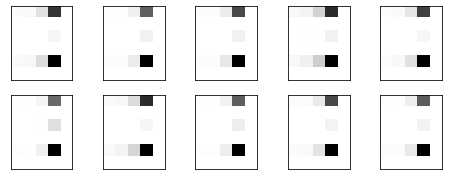

In [11]:

# Scatter plot of the data points
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [12]:

import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [13]:

from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)


0.9050966608084359

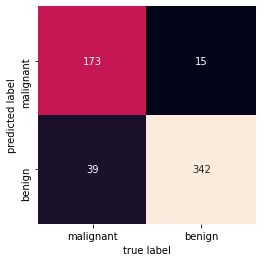

In [14]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label');